In [1]:
import pandas as pd
import numpy as np

# train.csv 읽어 df에 저장
df = pd.read_csv('train.csv')
# 5개 출력
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Pclass Sex Embarked 만 추출해서 5개 출력
df[['Pclass', 'Sex', 'Embarked']].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [3]:
# train.csv 읽어 test_df에 저장
test_df = pd.read_csv('test.csv')
# 5개 출력
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [73]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [72]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [6]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [8]:
# test 셋도 적용
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())

In [9]:
# Fare 빈칸을 평균으로 대체
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

In [10]:
# SibSp와 Parch를 더하여 FamilySize 생성
df['FamilySize'] = df['SibSp']+df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
test_df['FamilySize'] = test_df['SibSp']+test_df['Parch']
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [12]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [13]:
# Cabin(객실) 정보에서 번호만 삭제하고 알파벳만 남기기
df['Cabin']= df['Cabin'].str[0]
df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [14]:
df['Cabin']=df['Cabin'].fillna('C')

In [15]:
# test 적용
test_df['Cabin']= test_df['Cabin'].str[0]
test_df['Cabin'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [16]:
test_df['Cabin']=test_df['Cabin'].fillna('C')

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
FamilySize     0
dtype: int64

In [18]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
df['Embarked'] = df['Embarked'].fillna('S')

In [21]:
test_df['Embarked'] = test_df['Embarked'].fillna('S')

In [22]:
df['Cabin']

0      C
1      C
2      C
3      C
4      C
      ..
886    C
887    B
888    C
889    C
890    C
Name: Cabin, Length: 891, dtype: object

In [23]:
# 문자를 숫자로 변환 ( C==>0 / B==>1 / D==>2 / E==>3 )
# df.loc[df['Cabin']=='C','Cabin']=0
# df.loc[df['Cabin']=='B','Cabin']=1

df['Cabin'] = df['Cabin'].map({
    'C' :0,
    'B' :1,
    'D' : 2,
    'E' : 3,
    'A' : 4,
    'F' : 5,
    'G' : 6,
    'T' : 7,
})

In [24]:
df['Cabin'].value_counts()

0    746
1     47
2     33
3     32
4     15
5     13
6      4
7      1
Name: Cabin, dtype: int64

In [25]:
test_df['Cabin'] = test_df['Cabin'].map({
    'C' : 0,
    'B' : 1,
    'D' : 2,
    'E' : 3,
    'A' : 4,
    'F' : 5,
    'G' : 6,
    'T' : 7,
})

In [26]:
test_df['Cabin'].value_counts()

0    362
1     18
2     13
3      9
5      8
4      7
6      1
Name: Cabin, dtype: int64

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0


In [28]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
test_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [30]:
df['Embarked'] = df['Embarked'].map({
    'S' : 0,
    'C' : 1,
    'Q' : 2,
})

In [31]:
test_df['Embarked'] = test_df['Embarked'].map({
    'S' : 0,
    'C' : 1,
    'Q' : 2,
})

In [32]:
df['Sex'] = df['Sex'].map({
    'male' : 0,
    'female' : 1,
})

In [33]:
test_df['Sex'] = test_df['Sex'].map({
    'male' : 0,
    'female' : 1,
})

In [34]:
df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [35]:
test_df['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [36]:
# 더이상 필요없는 열 삭제 'Name','Ticket','SibSp','Parch','PassengerId'
train = df.drop(['Name','Ticket','SibSp','Parch','PassengerId'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,0,1
1,1,1,1,38.0,71.2833,0,1,1
2,1,3,1,26.0,7.9250,0,0,0
3,1,1,1,35.0,53.1000,0,0,1
4,0,3,0,35.0,8.0500,0,0,0


In [37]:
test = test_df.drop(['Name','Ticket','SibSp','Parch','PassengerId'], axis=1)
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,34.5,7.8292,0,2,0
1,3,1,47.0,7.0000,0,0,1
2,2,0,62.0,9.6875,0,2,0
3,3,0,27.0,8.6625,0,0,0
4,3,1,22.0,12.2875,0,0,2


In [38]:
# Training set
# 모델의 학습에 사용되는 데이터

# Validation set
# 모델 제작 과정 중, 학습된 모델의 성능을 측정하기 위한 데이터

# Test set 모델의 최종 성능을 평가하기 위한 데이터

In [39]:
# 훈련용 데이터 에서 데이터, label(target) 분리
train_data = train.drop('Survived', axis=1) # 학습용데이터
target_data = train['Survived'] # 학습용데이터의 label(target)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,0,1
1,1,1,1,38.0,71.2833,0,1,1
2,1,3,1,26.0,7.9250,0,0,0
3,1,1,1,35.0,53.1000,0,0,1
4,0,3,0,35.0,8.0500,0,0,0


In [40]:
target_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_data, target_data)
print(train_data.shape, x_train.shape, x_valid.shape)

(891, 7) (668, 7) (223, 7)


In [42]:
# sklearn 의 Decision Tree Classifier 를 사용하여 학습
from sklearn.tree import DecisionTreeClassifier

# Decision Tree로 모델 생성
tree_dec = DecisionTreeClassifier()

# 학습
tree_dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
print('training set accuracy :', tree_dec.score(x_train, y_train))
print('Validation set accuracy :', tree_dec.score(x_valid, y_valid))

training set accuracy : 0.9910179640718563
Validation set accuracy : 0.7802690582959642


In [44]:
# 만들어진 Decision Tree로 test 데이터 판단
prediction = tree_dec.predict(test)
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [45]:
submit = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : prediction
})
submit.to_csv('survived.csv', index=False)

In [46]:
my_prediction = pd.read_csv('survived.csv')
my_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


[Text(551.25439453125, 901.0170000000002, 'Sex <= 0.5\ngini = 0.477\nsamples = 668\nvalue = [405, 263]\nclass = Unsurvived'),
 Text(204.7587890625, 854.8110000000001, 'Age <= 5.5\ngini = 0.312\nsamples = 430\nvalue = [347, 83]\nclass = Unsurvived'),
 Text(18.0, 808.6050000000001, 'FamilySize <= 3.5\ngini = 0.375\nsamples = 16\nvalue = [4, 12]\nclass = Survived'),
 Text(9.0, 762.3990000000001, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = Survived'),
 Text(27.0, 762.3990000000001, 'Fare <= 31.331\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Unsurvived'),
 Text(18.0, 716.1930000000001, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Unsurvived'),
 Text(36.0, 716.1930000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(391.517578125, 808.6050000000001, 'Fare <= 26.269\ngini = 0.284\nsamples = 414\nvalue = [343, 71]\nclass = Unsurvived'),
 Text(119.28515625, 762.3990000000001, 'Age <= 13.5\ngini = 0.195\nsamples = 301\nvalue = [268, 33]\nclass = Unsu

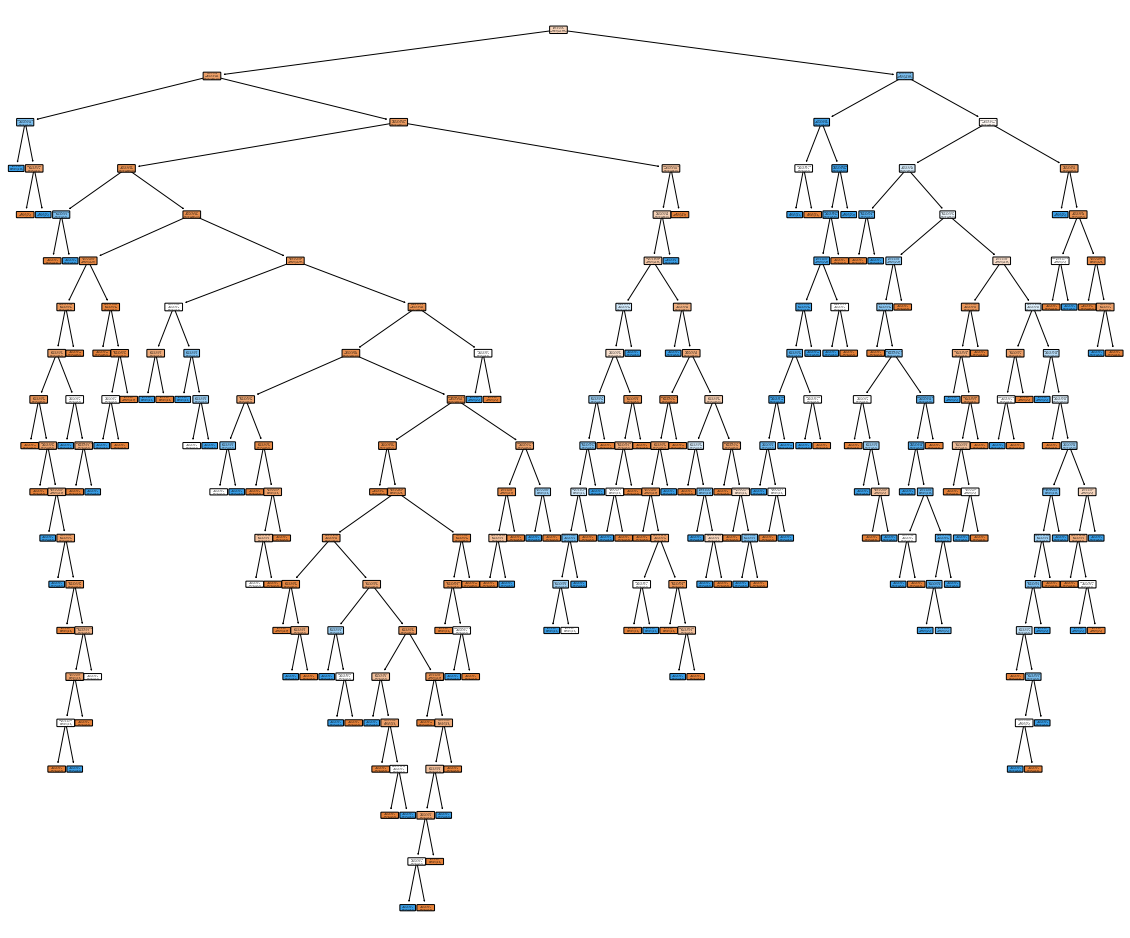

In [47]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,17))
feature_name=['Pclass','Sex','Age','Fare','Cabin','Embarked','FamilySize']
tree.plot_tree(tree_dec,
              class_names=['Unsurvived','Survived'],
              feature_names=feature_name,
              impurity=True,
              filled=True,
              rounded=True)

In [48]:
print("importance : ", tree_dec.feature_importances_)

importance :  [0.10352849 0.31140347 0.24049218 0.21311032 0.03909208 0.01825083
 0.07412263]


In [49]:
for name, value in zip(feature_name, tree_dec.feature_importances_):
    print('{0}: {1:3f}'.format(name, value))

Pclass: 0.103528
Sex: 0.311403
Age: 0.240492
Fare: 0.213110
Cabin: 0.039092
Embarked: 0.018251
FamilySize: 0.074123


<AxesSubplot:>

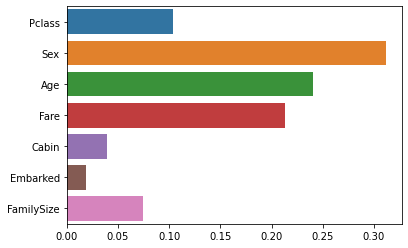

In [51]:
import seaborn as sns
sns.barplot(x=tree_dec.feature_importances_, y=feature_name)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [58]:
# parameters = {
#     'max_depth' : [8,10,12,15],
#     'min_samples_split' : [4,5,7],
#     'min_samples_leaf'  : [1,2,3]
# }

parameters = {
    'max_depth' : [2,3,5,10],
    'min_samples_split' : [7,8,9],
    'min_samples_leaf'  : [3,4,5]
}
grid_dclf = GridSearchCV(tree_dec, param_grid=parameters, scoring='accuracy',cv=5)
grid_dclf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [7, 8, 9]},
             scoring='accuracy')

In [59]:
grid_dclf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [7, 8, 9]},
             scoring='accuracy')

In [60]:
print(f'GridSearchCV 최적 하이퍼 파라미터: {grid_dclf.best_params_}')

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 7}


In [61]:
print(f'GridSearchCV 최고 정확도: {grid_dclf.best_score_,4}')

GridSearchCV 최고 정확도: (0.8098417686006061, 4)


In [62]:
best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(x_valid)
accuracy = accuracy_score(y_valid,dpredictions)
print(f'테스트 세트에서의 DecisionTreeClassifier정확도 : {round(accuracy,4)}')

테스트 세트에서의 DecisionTreeClassifier정확도 : 0.8161


In [63]:
# 훈련용
tree_dec.fit(x_train, y_train)
dt_pred = tree_dec.predict(x_valid) # 검증용
print('tree_dec DecisionTreeClassifier 정확도 : {0:.4f}'
     .format(accuracy_score(y_valid, dt_pred)))

tree_dec DecisionTreeClassifier 정확도 : 0.7758


In [64]:
y_valid.shape

(223,)

In [67]:
length = y_valid.shape[0]
accuracy = accuracy_score(y_valid, dt_pred)
print(f'총 {length}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤')

총 223명 중 77.578% 정확도로 생존을 맞춤


In [68]:
best_accuracy = accuracy_score(y_valid,dpredictions)
print(f'총 {length}명 중 {best_accuracy * 100:.3f}% 정확도로 생존을 맞춤')

총 223명 중 81.614% 정확도로 생존을 맞춤


[Text(463.33928571428567, 847.1100000000001, 'Sex <= 0.5\ngini = 0.477\nsamples = 668\nvalue = [405, 263]\nclass = Unsurvived'),
 Text(199.28571428571428, 693.0900000000001, 'Age <= 5.5\ngini = 0.312\nsamples = 430\nvalue = [347, 83]\nclass = Unsurvived'),
 Text(79.71428571428571, 539.0700000000002, 'FamilySize <= 3.5\ngini = 0.375\nsamples = 16\nvalue = [4, 12]\nclass = Survived'),
 Text(39.857142857142854, 385.05000000000007, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = Survived'),
 Text(119.57142857142856, 385.05000000000007, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Unsurvived'),
 Text(318.85714285714283, 539.0700000000002, 'Fare <= 26.269\ngini = 0.284\nsamples = 414\nvalue = [343, 71]\nclass = Unsurvived'),
 Text(199.28571428571428, 385.05000000000007, 'Age <= 13.5\ngini = 0.195\nsamples = 301\nvalue = [268, 33]\nclass = Unsurvived'),
 Text(159.42857142857142, 231.0300000000001, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Survived'),
 Text(239.142857142857

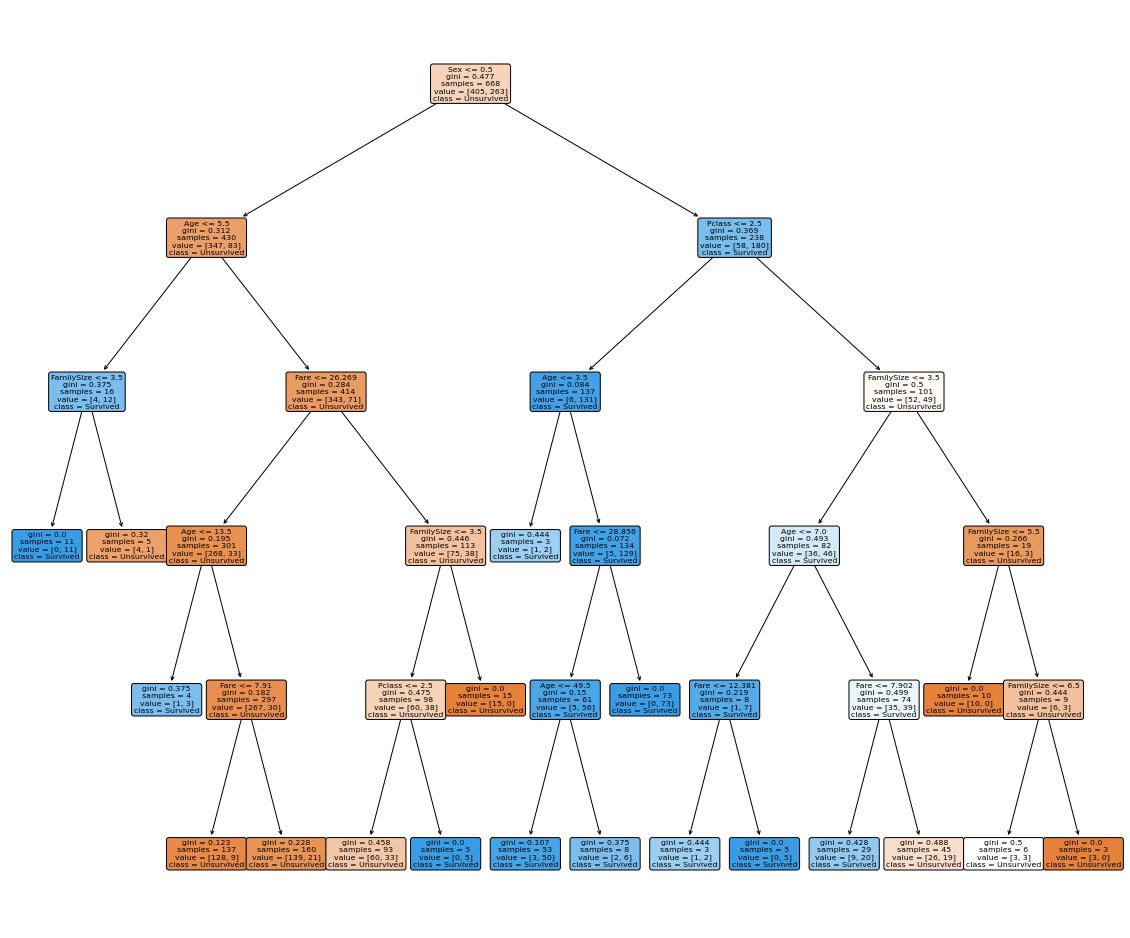

In [71]:
# 시각화 : 하이퍼파라미터 적용한 모델
plt.figure(figsize=(20,17))
feature_name=['Pclass','Sex','Age','Fare','Cabin','Embarked','FamilySize']
tree.plot_tree(best_dclf,
              class_names=['Unsurvived','Survived'],
              feature_names=feature_name,
              impurity=True,
              filled=True,
              rounded=True)